In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.linear_model
import scipy.stats
from scipy.stats import norm
from scipy.stats import skew

df=pd.read_csv('Amazon.csv')

# Explore the data

In [2]:
df.shape

(6973, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 14 columns):
Index                     6973 non-null int64
ProductName               6973 non-null object
ScrapeDate                6973 non-null object
ScrapedIndex              6973 non-null int64
ScrapedIndexTrueRank      6973 non-null int64
CorrectedIndexTrueRank    6973 non-null int64
ScrapedIndexPrice         6973 non-null float64
CorrectedPrice            6973 non-null float64
ScrapedIndexVendor        6973 non-null object
ScrapedIndexVendorType    6973 non-null object
BBScrapedPrice            6973 non-null float64
BBVendorType              6973 non-null object
BBVendor                  6809 non-null object
BBCorrectedPrice          6973 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 762.8+ KB


In [4]:
df.head().T

,0,1,2,3,4
Index,0,1,2,3,4
ProductName,#1 BEST Probiotic Supplement - 60 Day Supply w...,#1 BEST Probiotic Supplement - 60 Day Supply w...,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...","10 Panel Dip Drug Testing Kit, Test for 10 Dif...","10 Panel Dip Drug Testing Kit, Test for 10 Dif..."
ScrapeDate,14/06/2016,14/06/2016,27/06/2016,27/06/2016,27/06/2016
ScrapedIndex,2,1,1,2,3
ScrapedIndexTrueRank,2,1,1,1,1
CorrectedIndexTrueRank,1,2,1,1,1
ScrapedIndexPrice,20.99,19.99,3.96,3.96,3.96
CorrectedPrice,20.99,25.02,3.96,3.96,3.96
ScrapedIndexVendor,Supplement Warriors,Sharp Nutrition,speedy tests,Drug Abuse Control,Lowest Priced Tests
ScrapedIndexVendorType,Other,FBA,Other,Other,Other


In [5]:
df.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

In [6]:
# we will check what is the top 5 most requested products
pd.DataFrame(df['ProductName'].value_counts())

,ProductName
Fujifilm INSTAX Mini Instant Film (Rainbow),154
Suncast GHW1732 Resin Wicker Trash Hideaway,115
Fiskars 45mm Contour Rotary Cutter (195210-1001),106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit,95
Honeywell HT-908 Turbo Force Room Air Circulator Fan,90
...,...
Everydrop by Whirlpool Refrigerator Water Filter 4 EDR4RXD2 (Pack of 2),2
"iPhone 6S Screen Protector, Maxboost Tempered Glass Screen Protector For iPhone 6 6S [3D Touch Compatible] 0.2mm Screen Protection Case Fit 99% Touch Accurate[Lifetime Warranty]- Clear",2
"Orgain Organic Protein Plant-Based Powder, Vanilla Bean, 2.03 Pound",2
"Samsung Galaxy Tab A 8-Inch Tablet (Wi-Fi)(16 GB, Smoky Titanium)",1


we can see the most product requested is  
 1. Fujifilm INSTAX Mini Instant Film (Rainbow) count 154 
 2. Suncast GHW1732 Resin Wicker Trash Hideaway count 115
  etc..
  


# DATE

In [7]:
#check the date 
print(df.ScrapeDate.min())
print(df.ScrapeDate.max())
df.ScrapeDate.value_counts().sort_index()

01/09/2016
31/08/2016


01/09/2016     65
02/09/2016    190
04/07/2016    117
06/09/2016    729
07/06/2016    259
08/06/2016    154
08/07/2016     91
13/06/2016     27
14/06/2016    666
15/06/2016    242
16/06/2016    176
17/06/2016    314
18/06/2016    151
18/08/2016     15
19/06/2016    225
20/06/2016    139
21/06/2016    773
24/06/2016     46
25/06/2016      9
26/06/2016    657
27/06/2016    400
28/06/2016     97
29/06/2016    273
29/08/2016    454
30/08/2016    516
31/08/2016    188
Name: ScrapeDate, dtype: int64

In [8]:
pd.DataFrame(df['ScrapeDate'].value_counts())

,ScrapeDate
21/06/2016,773
06/09/2016,729
14/06/2016,666
26/06/2016,657
30/08/2016,516
29/08/2016,454
27/06/2016,400
17/06/2016,314
29/06/2016,273
07/06/2016,259


In [8]:
#convert the one date column in a DateTime object to see if that helps with some visualization.
#df.ScrapeDate.value_counts().sort_index()

df['ScrapeDateConverted'] = pd.to_datetime(df.ScrapeDate)

df[['year','month','day']] = \
pd.DataFrame([(x.year, x.month, x.day) for x in df['ScrapeDateConverted']])

df[['ScrapeDateConverted', 'year','month','day']].head()

,ScrapeDateConverted,year,month,day
0,2016-06-14,2016,6,14
1,2016-06-14,2016,6,14
2,2016-06-27,2016,6,27
3,2016-06-27,2016,6,27
4,2016-06-27,2016,6,27


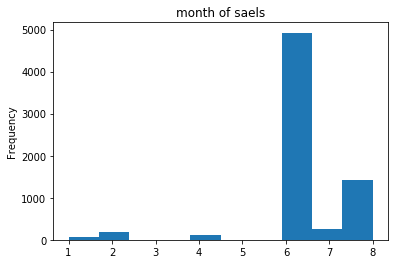

In [9]:
df['month'].plot.hist(title ='month of saels');

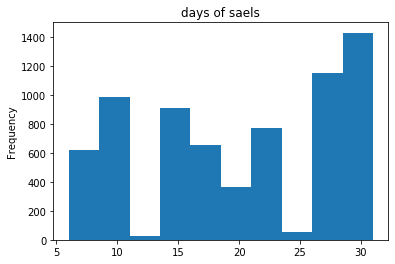

In [10]:
df['day'].plot.hist(title ='days of saels');

# VENDOR

we can see the Buy box for amazon and FBA

In [11]:
df.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice',
       'ScrapeDateConverted', 'year', 'month', 'day'],
      dtype='object')

In [12]:
df.ScrapedIndexVendorType.value_counts()

Other     6372
FBA        409
Amazon     192
Name: ScrapedIndexVendorType, dtype: int64

In [13]:
df.ScrapedIndexVendorType.value_counts(normalize=True).mul(100)

Other     91.381041
FBA        5.865481
Amazon     2.753478
Name: ScrapedIndexVendorType, dtype: float64

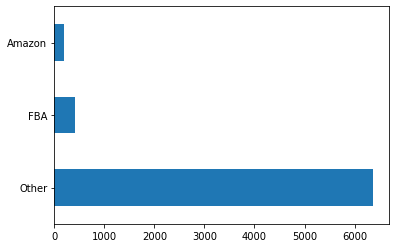

In [14]:
df['ScrapedIndexVendorType'].value_counts().plot(kind='barh', rot=0);


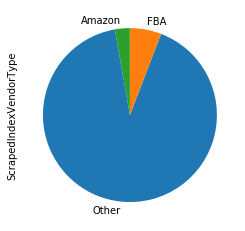

In [15]:
df['ScrapedIndexVendorType'].value_counts().plot(kind='pie', startangle = 100);

In [16]:
df.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice',
       'ScrapeDateConverted', 'year', 'month', 'day'],
      dtype='object')

In [17]:
df.BBVendorType.value_counts()

Amazon    5788
O          715
FBA        470
Name: BBVendorType, dtype: int64

In [18]:
df.BBVendorType.value_counts(normalize=True).mul(100)

Amazon    83.005880
O         10.253836
FBA        6.740284
Name: BBVendorType, dtype: float64

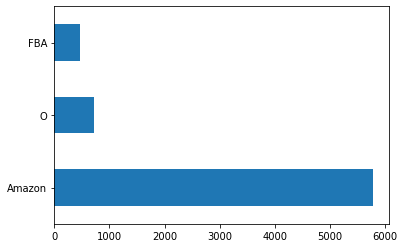

In [19]:
df['BBVendorType'].value_counts().plot(kind='barh', rot=0);


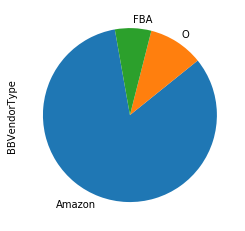

In [21]:
df['BBVendorType'].value_counts().plot(kind='pie', startangle = 100);

Chang datatype for BBVendortype by mapping

In [22]:
df['BBVendorType_Num']= df.BBVendorType.map({'O':1,'FBA':2,'Amazon':3})

In [23]:
df.BBVendorType_Num.value_counts()

3    5788
1     715
2     470
Name: BBVendorType_Num, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 19 columns):
Index                     6973 non-null int64
ProductName               6973 non-null object
ScrapeDate                6973 non-null object
ScrapedIndex              6973 non-null int64
ScrapedIndexTrueRank      6973 non-null int64
CorrectedIndexTrueRank    6973 non-null int64
ScrapedIndexPrice         6973 non-null float64
CorrectedPrice            6973 non-null float64
ScrapedIndexVendor        6973 non-null object
ScrapedIndexVendorType    6973 non-null object
BBScrapedPrice            6973 non-null float64
BBVendorType              6973 non-null object
BBVendor                  6809 non-null object
BBCorrectedPrice          6973 non-null float64
ScrapeDateConverted       6973 non-null datetime64[ns]
year                      6973 non-null int64
month                     6973 non-null int64
day                       6973 non-null int64
BBVendorType_Num          6973 non-null in

In [25]:
pd.DataFrame(df['BBVendorType_Num'].value_counts())

,BBVendorType_Num
3,5788
1,715
2,470


In [26]:
df['ScrapedIndexVendorType_Num']= df.ScrapedIndexVendorType.map({'Other':1,'FBA':2,'Amazon':3})

In [27]:
df.ScrapedIndexVendorType_Num.value_counts()

1    6372
2     409
3     192
Name: ScrapedIndexVendorType_Num, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 20 columns):
Index                         6973 non-null int64
ProductName                   6973 non-null object
ScrapeDate                    6973 non-null object
ScrapedIndex                  6973 non-null int64
ScrapedIndexTrueRank          6973 non-null int64
CorrectedIndexTrueRank        6973 non-null int64
ScrapedIndexPrice             6973 non-null float64
CorrectedPrice                6973 non-null float64
ScrapedIndexVendor            6973 non-null object
ScrapedIndexVendorType        6973 non-null object
BBScrapedPrice                6973 non-null float64
BBVendorType                  6973 non-null object
BBVendor                      6809 non-null object
BBCorrectedPrice              6973 non-null float64
ScrapeDateConverted           6973 non-null datetime64[ns]
year                          6973 non-null int64
month                         6973 non-null int64
day                 

In [29]:
df.BBVendor.str.contains('Amazon').value_counts()

True     6258
False     551
Name: BBVendor, dtype: int64

In [30]:
df.BBVendor.str.contains('Amazon').value_counts(normalize=True).mul(100)

True     91.907769
False     8.092231
Name: BBVendor, dtype: float64

In [31]:
pd.DataFrame(df['ScrapedIndexVendorType'].value_counts())

,ScrapedIndexVendorType
Other,6372
FBA,409
Amazon,192


In [32]:
pd.DataFrame(df['BBVendorType'].value_counts())

,BBVendorType
Amazon,5788
O,715
FBA,470


In [33]:
df.ScrapedIndexVendor.value_counts()

Amazon.com               192
UnbeatableSale, Inc       47
Gatzies                   41
DDN INC                   37
MINDeyes                  35
                        ... 
Electric Stagecoach        1
K&M Camera Since 1976      1
xtstorm                    1
General Store Depot        1
Shop Chimney               1
Name: ScrapedIndexVendor, Length: 2892, dtype: int64

In [34]:
df.ScrapedIndexVendor.value_counts(normalize=True).mul(100)

Amazon.com               2.753478
UnbeatableSale, Inc      0.674028
Gatzies                  0.587982
DDN INC                  0.530618
MINDeyes                 0.501936
                           ...   
Electric Stagecoach      0.014341
K&M Camera Since 1976    0.014341
xtstorm                  0.014341
General Store Depot      0.014341
Shop Chimney             0.014341
Name: ScrapedIndexVendor, Length: 2892, dtype: float64

NULL VALUE 

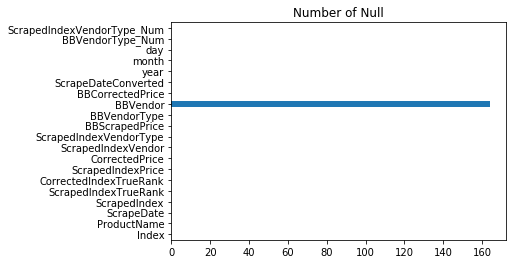

In [35]:
#1. Create a bar chart showing how many missing values are in each column
df.isnull().sum().plot.barh()
plt.title('Number of Null');


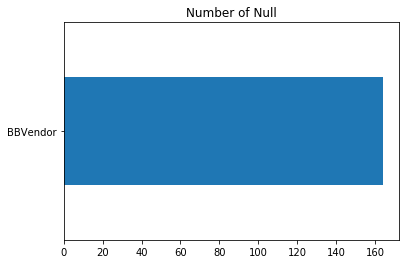

In [36]:
# filter 

df.isnull().sum()[df.isnull().sum() !=0].sort_values().plot.barh()
plt.title('Number of Null');

In [37]:
#2. Which column has the most `NaN` values? How many cells in that column are empty?
df.isnull().sum().sort_values(ascending=False)

BBVendor                      164
ScrapedIndexVendorType_Num      0
ScrapedIndexVendor              0
ProductName                     0
ScrapeDate                      0
ScrapedIndex                    0
ScrapedIndexTrueRank            0
CorrectedIndexTrueRank          0
ScrapedIndexPrice               0
CorrectedPrice                  0
ScrapedIndexVendorType          0
BBVendorType_Num                0
BBScrapedPrice                  0
BBVendorType                    0
BBCorrectedPrice                0
ScrapeDateConverted             0
year                            0
month                           0
day                             0
Index                           0
dtype: int64

In [38]:
#remove null values 
df.dropna(subset=['BBVendor'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 6972
Data columns (total 20 columns):
Index                         6809 non-null int64
ProductName                   6809 non-null object
ScrapeDate                    6809 non-null object
ScrapedIndex                  6809 non-null int64
ScrapedIndexTrueRank          6809 non-null int64
CorrectedIndexTrueRank        6809 non-null int64
ScrapedIndexPrice             6809 non-null float64
CorrectedPrice                6809 non-null float64
ScrapedIndexVendor            6809 non-null object
ScrapedIndexVendorType        6809 non-null object
BBScrapedPrice                6809 non-null float64
BBVendorType                  6809 non-null object
BBVendor                      6809 non-null object
BBCorrectedPrice              6809 non-null float64
ScrapeDateConverted           6809 non-null datetime64[ns]
year                          6809 non-null int64
month                         6809 non-null int64
day                 

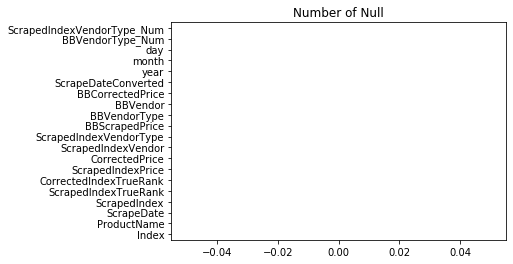

In [39]:
#check 
df.isnull().sum().plot.barh()
plt.title('Number of Null');


In [40]:
#2. Which column has the most `NaN` values? How many cells in that column are empty?
df.isnull().sum().sort_values(ascending=False)

ScrapedIndexVendorType_Num    0
BBVendorType_Num              0
ProductName                   0
ScrapeDate                    0
ScrapedIndex                  0
ScrapedIndexTrueRank          0
CorrectedIndexTrueRank        0
ScrapedIndexPrice             0
CorrectedPrice                0
ScrapedIndexVendor            0
ScrapedIndexVendorType        0
BBScrapedPrice                0
BBVendorType                  0
BBVendor                      0
BBCorrectedPrice              0
ScrapeDateConverted           0
year                          0
month                         0
day                           0
Index                         0
dtype: int64

In [41]:
df.shape

(6809, 20)

day                  6           7           9     13     14     15     16  \
month count  413.000000  179.000000  984.000000  27.0  666.0  242.0  176.0   
      mean     7.372881    5.385475    4.897358   6.0    6.0    6.0    6.0   
      std      0.484157    1.908588    1.878462   0.0    0.0    0.0    0.0   
      min      7.000000    4.000000    1.000000   6.0    6.0    6.0    6.0   
      25%      7.000000    4.000000    2.000000   6.0    6.0    6.0    6.0   
      50%      7.000000    4.000000    6.000000   6.0    6.0    6.0    6.0   
      75%      8.000000    8.000000    6.000000   6.0    6.0    6.0    6.0   
      max      8.000000    8.000000    6.000000   6.0    6.0    6.0    6.0   

day             17          18     19     20     21    24   25     26     27  \
month count  314.0  166.000000  225.0  137.0  773.0  46.0  9.0  605.0  377.0   
      mean     6.0    6.180723    6.0    6.0    6.0   6.0  6.0    6.0    6.0   
      std      0.0    0.575133    0.0    0.0    0.0   0.0  0.0    0.0    0.0   
      min      6.0    6.000000    6.0    6.0    6.0   6.0  6.0    6.0    6.0   
      25%      6.0    6.000000    6.0    6.0    6.0   6.0  6.0    6.0    6.0   
      50%      6.0    6.000000    6.0    6.0    6.0   6.0  6.0    6.0    6.0   
      75%      6.0    6.000000    6.0    6.0    6.0   6.0  6.0    6.0    6.0   
      max      6.0    8.000000    6.0    6.0    6.0   6.0  6.0    6.0    6.0   

day            28          29     30     31  
month count  97.0  692.000000  493.0  188.0  
      mean    6.0    7.213873    8.0    8.0  
      std     0.0    0.977568    0.0    0.0  
      min     6.0    6.000000    8.0    8.0  
      25%     6.0    6.000000    8.0    8.0  
      50%     6.0    8.000000    8.0    8.0  
      75%     6.0    8.000000    8.0    8.0  
      max     6.0    8.000000    8.0    8.0

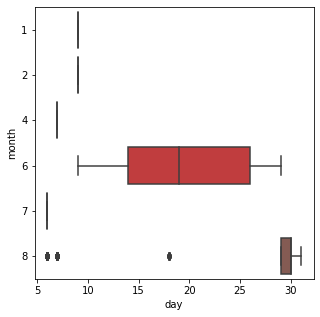

In [42]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x="day", y="month",data=df, orient='h')
df.groupby("day")[["month"]].describe().T

month         1      2      4            6      7            8
day count  65.0  190.0  117.0  4846.000000  259.0  1332.000000
    mean    9.0    9.0    7.0    18.949236    6.0    25.845345
    std     0.0    0.0    0.0     6.277148    0.0     8.723059
    min     9.0    9.0    7.0     9.000000    6.0     6.000000
    25%     9.0    9.0    7.0    14.000000    6.0    29.000000
    50%     9.0    9.0    7.0    19.000000    6.0    30.000000
    75%     9.0    9.0    7.0    26.000000    6.0    30.000000
    max     9.0    9.0    7.0    29.000000    6.0    31.000000

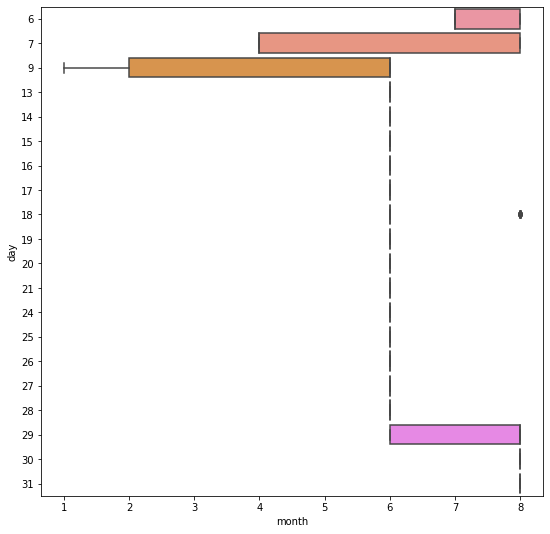

In [43]:
fig=plt.figure(figsize=(9,9))
sns.boxplot(x="month", y="day",data=df, orient='h')
df.groupby("month")[["day"]].describe().T

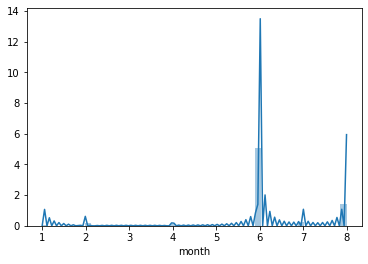

In [44]:
sns.distplot(df.month);

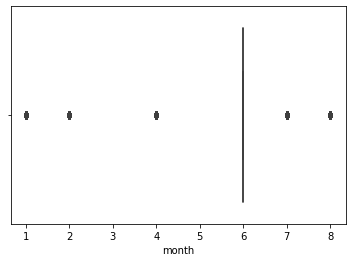

In [45]:
sns.boxplot(df.month);
#plt.vlines(x=train['Fare'].kurt(),ymin=0, ymax=1, colors='tomato');

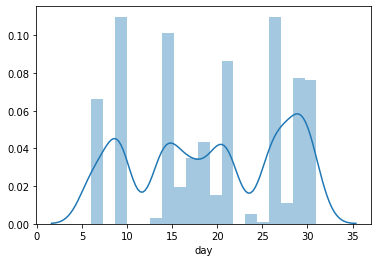

In [46]:
sns.distplot(df.day);

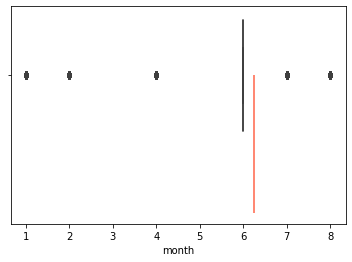

In [47]:
sns.boxplot(df.month);
plt.vlines(x=df['month'].mean(),ymin=0, ymax=1, colors='tomato');

In [48]:
df.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice',
       'ScrapeDateConverted', 'year', 'month', 'day', 'BBVendorType_Num',
       'ScrapedIndexVendorType_Num'],
      dtype='object')

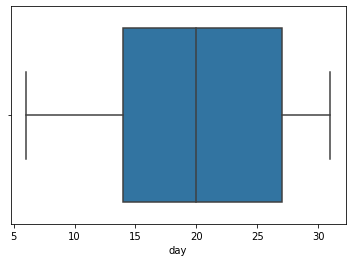

In [49]:
sns.boxplot(df.day);


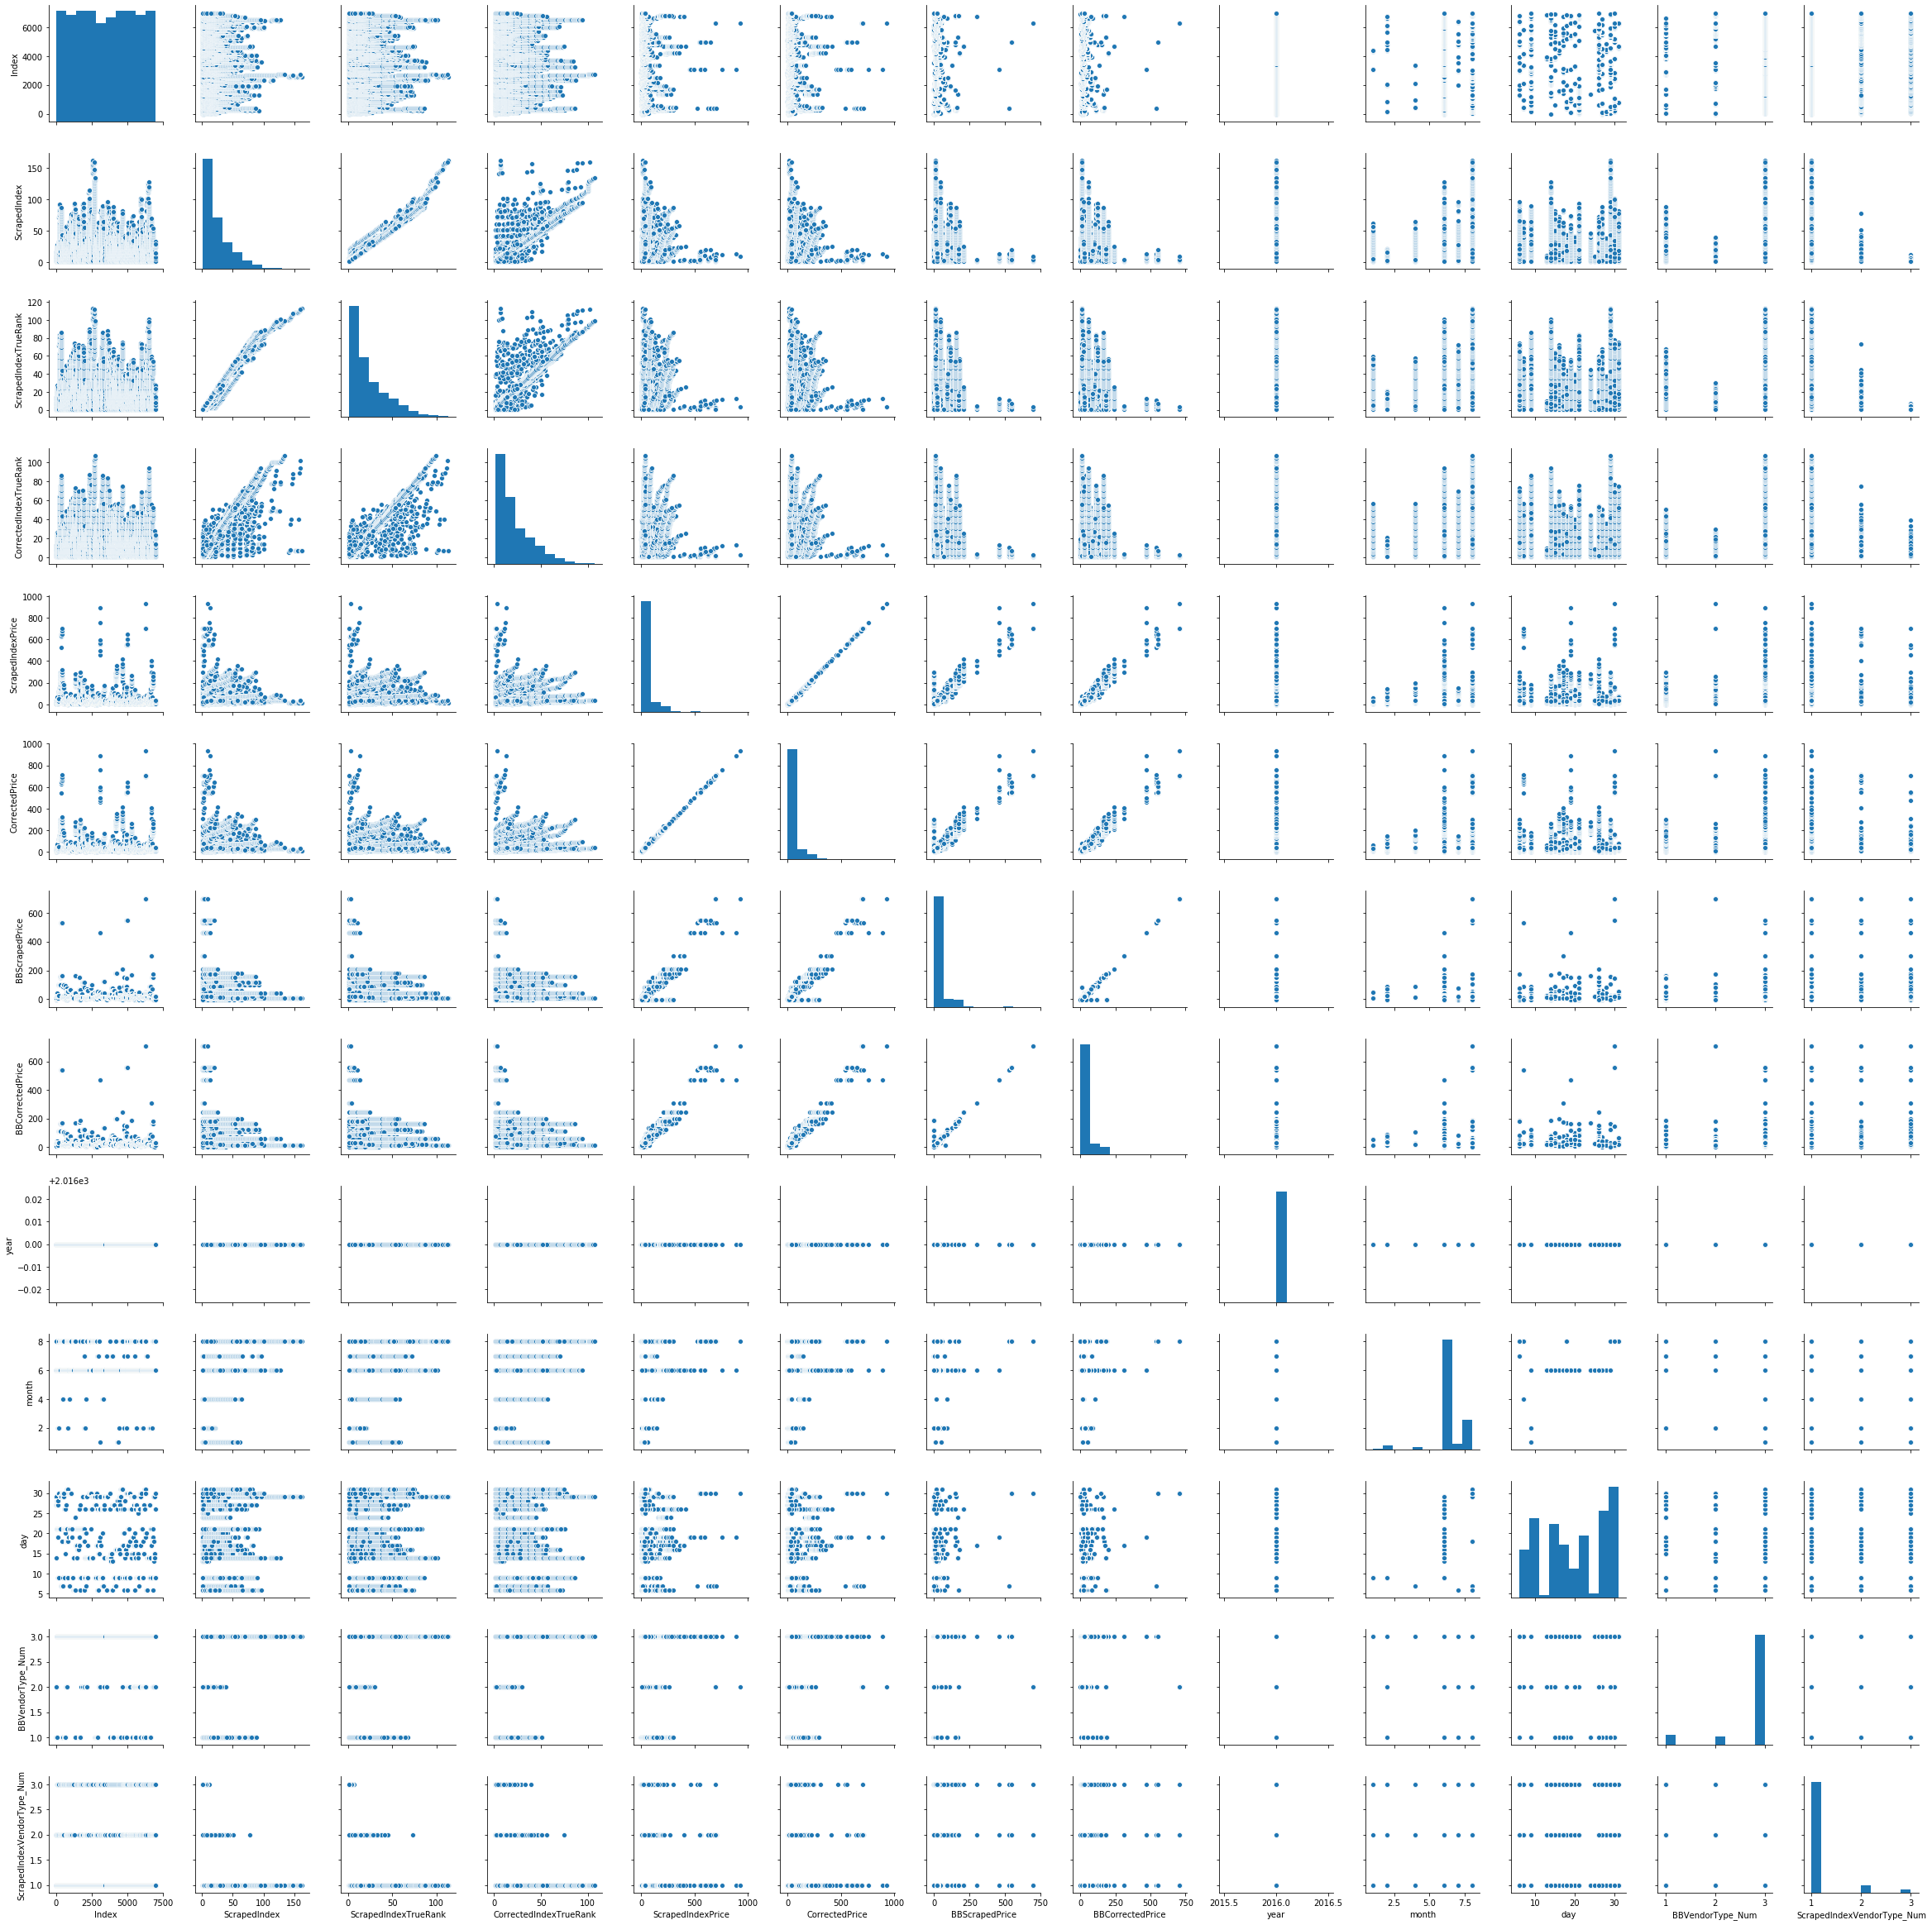

In [54]:
sns.pairplot(df);

In [55]:
df.columns 

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice',
       'ScrapeDateConverted', 'year', 'month', 'day', 'BBVendorType_Num',
       'ScrapedIndexVendorType_Num'],
      dtype='object')

In [56]:
df.dtypes

Index                                  int64
ProductName                           object
ScrapeDate                            object
ScrapedIndex                           int64
ScrapedIndexTrueRank                   int64
CorrectedIndexTrueRank                 int64
ScrapedIndexPrice                    float64
CorrectedPrice                       float64
ScrapedIndexVendor                    object
ScrapedIndexVendorType                object
BBScrapedPrice                       float64
BBVendorType                          object
BBVendor                              object
BBCorrectedPrice                     float64
ScrapeDateConverted           datetime64[ns]
year                                   int64
month                                  int64
day                                    int64
BBVendorType_Num                       int64
ScrapedIndexVendorType_Num             int64
dtype: object